<a href="https://colab.research.google.com/github/adinsa1/DATA205-PROJECT/blob/main/AssefaData205Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
#df=pd.read_csv('/content/Daily_Arrests_20241001 (1).csv')
df=pd.read_csv('https://raw.githubusercontent.com/adinsa1/DATA205-PROJECT/refs/heads/main/Daily_Arrests_20241001%20(1).csv')


In [ ]:
df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
0,ENCARNAION HERASME,LUIS,NaN,24,Block Of 6841 TREXLEY,ASHFORK,MD,09/19/2024,VIOLATE PROTECTIVE ORDER
1,DEL CID-PALACIOS,JEFFREY,MITCHELL,34,11700 Block Of Leona St,SILVER SPRING,MD,09/19/2024,INTIMIDATE/INFLU JUROR-FELONY OFF
2,CHAVEZ,SANDRA,NaN,21,0 Block Of Silver Kettle Court,GAITHERSBURG,MD,09/19/2024,ASSAULT-SECOND DEGREE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
4,SIMON,DAVID,BRETT,74,12800 Block Of BRUSHWOOD TERR,Potomac,MD,09/19/2024,DRIVING UNINSURED VEHICLE


In [ ]:
df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LAST NAME    473 non-null    object
 1   FIRST NAME   473 non-null    object
 2   MIDDLE NAME  376 non-null    object
 3   AGE          473 non-null    int64 
 4   STREET       473 non-null    object
 5   CITY         473 non-null    object
 6   STATE        473 non-null    object
 7   ARREST DATE  473 non-null    object
 8   OFFENSE      473 non-null    object
dtypes: int64(1), object(8)
memory usage: 33.4+ KB


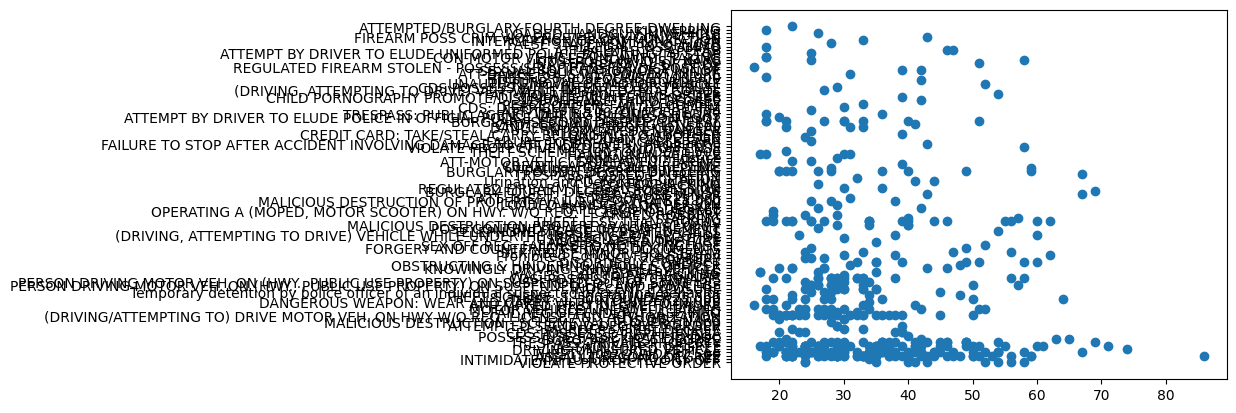

In [ ]:

plt.scatter(df['AGE'],df['OFFENSE'])

(array([ 84., 128.,  97.,  70.,  38.,  28.,  19.,   7.,   1.,   1.]),
 array([16., 23., 30., 37., 44., 51., 58., 65., 72., 79., 86.]),
 <BarContainer object of 10 artists>)

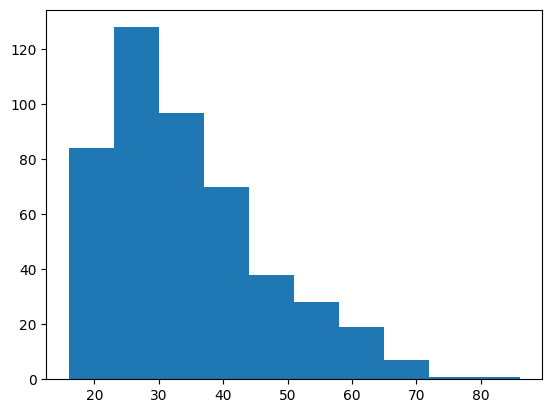

In [ ]:
plt.hist(df['AGE'])

In [ ]:
# prompt: which day of the week the most crime happen?

# Assuming 'ARREST_DATE' column contains the date of the arrest
# Convert 'ARREST_DATE' to datetime objects if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['ARREST DATE	']):
  df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

# Extract the day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['ARREST_DATE'].dt.dayofweek

# Group by day of the week and count the number of arrests
day_counts = df.groupby('DayOfWeek')['ARREST_DATE'].count()

# Find the day with the maximum number of arrests
most_crime_day = day_counts.idxmax()

# Map the day of the week index to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
most_crime_day_name = day_names[most_crime_day]

print(f"The day of the week with the most crime is: {most_crime_day_name}")


KeyError: 'ARREST DATE\t'

In [ ]:
# Print the column names to check for special characters or typos
for col in df.columns:
    print(repr(col))

'LAST NAME'
'FIRST NAME'
'MIDDLE NAME'
'AGE'
'STREET'
'CITY'
'STATE'
'ARREST DATE'
'OFFENSE'


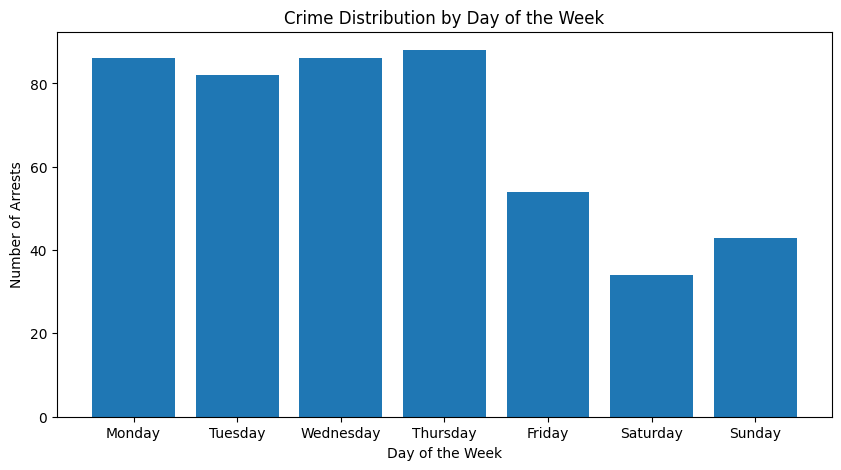

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE,DayOfWeek,Month
0,ENCARNAION HERASME,LUIS,NaN,24,Block Of 6841 TREXLEY,ASHFORK,MD,2024-09-19,VIOLATE PROTECTIVE ORDER,3,9
1,DEL CID-PALACIOS,JEFFREY,MITCHELL,34,11700 Block Of Leona St,SILVER SPRING,MD,2024-09-19,INTIMIDATE/INFLU JUROR-FELONY OFF,3,9
2,CHAVEZ,SANDRA,NaN,21,0 Block Of Silver Kettle Court,GAITHERSBURG,MD,2024-09-19,ASSAULT-SECOND DEGREE,3,9
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,2024-09-19,"THEFT: $100 TO UNDER $1,500",3,9
4,SIMON,DAVID,BRETT,74,12800 Block Of BRUSHWOOD TERR,Potomac,MD,2024-09-19,DRIVING UNINSURED VEHICLE,3,9


In [21]:
# prompt: which day of the week the most crime happen?

# Convert 'ARREST_DATE' to datetime objects if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['ARREST DATE']):
  df['ARREST DATE'] = pd.to_datetime(df['ARREST DATE'])

# Extract the day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['ARREST DATE'].dt.dayofweek

# Group by day of the week and count the number of arrests
day_counts = df.groupby('DayOfWeek')['ARREST DATE'].count()



# Map the day of the week index to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(day_names, day_counts)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Arrests")
plt.title("Crime Distribution by Day of the Week")
plt.show()

df.head()